In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Business problem:
    
Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries.

The analysis needs to be performed on the dataset to identify what are the trends happening in the industry, what type of content are people liking the most recently, most famous directors, actors, and director-actor combo etc. This is being done inorder to identify the areas to concentrate and hence grow the business.

In [138]:
df=pd.read_csv('netflix.csv')

In [6]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [7]:
df.shape

(8807, 12)

Total number of data points are 8807 and we have 12 columns available here.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [134]:
#Missing values are present in columns- director, cast, country, date added, rating, and duration.
#Missing numbers are prominent in the columns- country, director, cast and will have to be filled by some means.
#Datatypes of all columns except release year are object and necessary columns like director, cast, country, duration, etc. will have to be converted to string so that we can process the data.

In [654]:
print(df['release_year'].min(),df['release_year'].max())

1942 2021


In [9]:
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


1. We can here see that in netflix, number of movies are more compared to TV shows.
2. Number of movies are 6131 out of 8807.

In [135]:
#Converting the necessary columns into string so that they can be processed.


df[['country','director','cast','duration','listed_in','date_added']]=df[['country','director','cast','duration','listed_in','date_added']].astype(dtype='string')

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8711 entries, 0 to 8710
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         8711 non-null   int64 
 1   show_id       8711 non-null   object
 2   type          8711 non-null   object
 3   title         8711 non-null   object
 4   director      6173 non-null   string
 5   cast          7982 non-null   string
 6   country       7976 non-null   string
 7   date_added    8701 non-null   string
 8   release_year  8711 non-null   int64 
 9   rating        8707 non-null   object
 10  duration      8708 non-null   string
 11  listed_in     8711 non-null   string
 12  description   8711 non-null   object
dtypes: int64(2), object(5), string(6)
memory usage: 884.8+ KB


In [139]:
#Checking the number of rows where all director, cast, and country to check if they can be dropped.

df[['director','cast','country']].isna().all(axis=1).sum()

96

In [141]:
df.loc[df[['director','cast','country']].isna().all(axis=1)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
14,s15,TV Show,Crime Stories: India Detectives,NaN,NaN,NaN,"September 22, 2021",2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",Cameras following Bengaluru police on the job ...
74,s75,TV Show,The World's Most Amazing Vacation Rentals,NaN,NaN,NaN,"September 14, 2021",2021,TV-PG,2 Seasons,Reality TV,"With an eye for every budget, three travelers ..."
123,s124,TV Show,Luv Kushh,NaN,NaN,NaN,"September 2, 2021",2012,TV-Y7,1 Season,Kids' TV,"Based on the last book of the epic Ramayana, t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
7812,s7813,TV Show,Queens of Comedy,NaN,NaN,NaN,"May 1, 2018",2017,TV-MA,1 Season,"International TV Shows, Stand-Up Comedy & Talk...",Eight women perform in front of celebrity judg...
8109,s8110,TV Show,Strongland,NaN,NaN,NaN,"January 18, 2019",2018,TV-PG,1 Season,"Docuseries, International TV Shows",From Spain's countryside to Scotland's stony t...
8199,s8200,TV Show,The Bachelor,NaN,NaN,NaN,"December 1, 2019",2009,TV-14,1 Season,"Reality TV, Romantic TV Shows",A single man searches for his soulmate through...
8609,s8610,TV Show,Towies,NaN,NaN,NaN,"December 27, 2017",2016,TV-MA,1 Season,"International TV Shows, Reality TV",Australia's toughest tow truck operators work ...


In [142]:
#Dropping the 96 rows as mentioned above

df=df[~(df[['director','cast','country']].isna().all(axis=1))].reset_index()

In [143]:
df

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
4,5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8706,8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8707,8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8708,8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8709,8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [144]:
#Creating a copy of title and country so that the nested data in the country column can be splitted and melted.

dfc=df[['title','country']].copy()

In [145]:
dfc

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,NaN
3,Kota Factory,India
4,Midnight Mass,NaN
...,...,...
8706,Zinzana,"United Arab Emirates, Jordan"
8707,Zodiac,United States
8708,Zombieland,United States
8709,Zoom,United States


In [146]:
dfc=dfc.join(dfc['country'].str.split(', ', expand=True))

In [147]:
dfc

,title,country,0,1,2,3,4,5,6,7,8,9,10,11
0,Dick Johnson Is Dead,United States,United States,None,None,None,None,None,None,None,None,None,None,None
1,Blood & Water,South Africa,South Africa,None,None,None,None,None,None,None,None,None,None,None
2,Ganglands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Kota Factory,India,India,None,None,None,None,None,None,None,None,None,None,None
4,Midnight Mass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8706,Zinzana,"United Arab Emirates, Jordan",United Arab Emirates,Jordan,None,None,None,None,None,None,None,None,None,None
8707,Zodiac,United States,United States,None,None,None,None,None,None,None,None,None,None,None
8708,Zombieland,United States,United States,None,None,None,None,None,None,None,None,None,None,None
8709,Zoom,United States,United States,None,None,None,None,None,None,None,None,None,None,None


In [148]:
# Melting the columns into rows

dfc=dfc.melt(id_vars=['title','country'],value_name='Country')

In [149]:
dfc=dfc.drop(['country','variable'],axis='columns')

In [152]:
#Dropping the NA values which were created while melting

dfc.dropna(inplace=True)

In [153]:
dfc

,title,Country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
3,Kota Factory,India
6,Sankofa,United States
7,The Great British Baking Show,United Kingdom
...,...,...
77997,The Look of Silence,Germany
84548,Barbecue,Sweden
86708,The Look of Silence,Netherlands
93259,Barbecue,United States


In [25]:
dfc['title'].value_counts()

Barbecue                        12
The Look of Silence             10
Shaun the Sheep                  8
The Professor and the Madman     8
The Breadwinner                  7
                                ..
Eli                              1
Free Fire                        1
Jenny Slate: Stage Fright        1
Dancing with the Birds           1
Zubaan                           1
Name: title, Length: 7976, dtype: int64

Above are the slice of movies/shows which were released in the highest number of countries and 'Barbecue' is the one which is released in highest number of countries which are 12. Also, there are movies/shows which are released in single country as well.

In [155]:
#Repeating the same process of unnesting and melting for the column 'director'. Done in the same way as country.

dfd=df[['title','director']].copy()
dfd=dfd.join(dfd['director'].str.split(', ', expand=True))
dfd=dfd.melt(id_vars=['title','director'],value_name='Director')
dfd=dfd.drop(['director','variable'],axis='columns')
dfd.dropna(inplace=True)

In [156]:
dfd

,title,Director
0,Dick Johnson Is Dead,Kirsten Johnson
2,Ganglands,Julien Leclercq
4,Midnight Mass,Mike Flanagan
5,My Little Pony: A New Generation,Robert Cullen
6,Sankofa,Haile Gerima
...,...,...
94535,Movie 43,Rusty Cundieff
101624,Walt Disney Animation Studios Short Films Coll...,Mike Gabriel
102645,HALO Legends,Hiroshi Yamazaki
103246,Movie 43,James Gunn


In [157]:
#Repeating the same process of unnesting and melting for the column 'cast'. Done in the same way as country and director.

dfa=df[['title','cast']].copy()
dfa=dfa.join(dfa['cast'].str.split(', ', expand=True))
dfa=dfa.melt(id_vars=['title','cast'],value_name='Cast')
dfa=dfa.drop(['cast','variable'],axis='columns')
dfa.dropna(inplace=True)

In [159]:
dfa

,title,Cast
1,Blood & Water,Ama Qamata
2,Ganglands,Sami Bouajila
3,Kota Factory,Mayur More
4,Midnight Mass,Kate Siegel
5,My Little Pony: A New Generation,Vanessa Hudgens
...,...,...
413122,Black Mirror,Jon Hamm
419938,Social Distance,Ayize Ma'at
421833,Black Mirror,Oona Chaplin
428649,Social Distance,Lovie Simone


In [160]:
#Repeating the same process of unnesting and melting for the column 'listed_in'. Done in the same way as country and director.dfa

dfg=df[['title','listed_in']].copy()
dfg=dfg.join(dfg['listed_in'].str.split(', ', expand=True))
dfg=dfg.melt(id_vars=['title','listed_in'],value_name='Genre')
dfg=dfg.drop(['listed_in','variable'],axis='columns')
dfg.dropna(inplace=True)

In [161]:
dfg

,title,Genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Ganglands,Crime TV Shows
3,Kota Factory,International TV Shows
4,Midnight Mass,TV Dramas
...,...,...
26125,Zed Plus,International Movies
26127,Zindagi Gulzar Hai,TV Dramas
26128,Zinzana,Thrillers
26129,Zodiac,Thrillers


In [162]:
#Merging the unnested data of columns country, director, cast, and listed_in

df1=pd.merge(left=df,right=dfc,on='title',how='left').merge(right=dfd,on='title',how='left').merge(right=dfa,on='title',how='left').merge(right=dfg,on='title',how='left')

In [33]:
df1

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Country,Director,Cast,Genre
0,0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,<NA>,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",United States,Kirsten Johnson,NaN,Documentaries
1,1,s2,TV Show,Blood & Water,<NA>,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",South Africa,NaN,Ama Qamata,International TV Shows
2,1,s2,TV Show,Blood & Water,<NA>,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",South Africa,NaN,Ama Qamata,TV Dramas
3,1,s2,TV Show,Blood & Water,<NA>,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",South Africa,NaN,Ama Qamata,TV Mysteries
4,1,s2,TV Show,Blood & Water,<NA>,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",South Africa,NaN,Khosi Ngema,International TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201802,8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,India,Mozez Singh,Anita Shabdish,International Movies
201803,8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,India,Mozez Singh,Anita Shabdish,Music & Musicals
201804,8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,India,Mozez Singh,Chittaranjan Tripathy,Dramas
201805,8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,India,Mozez Singh,Chittaranjan Tripathy,International Movies


In [163]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201807 entries, 0 to 201806
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   index         201807 non-null  int64 
 1   show_id       201807 non-null  object
 2   type          201807 non-null  object
 3   title         201807 non-null  object
 4   director      151348 non-null  object
 5   cast          199845 non-null  object
 6   country       190094 non-null  object
 7   date_added    201649 non-null  object
 8   release_year  201807 non-null  int64 
 9   rating        201740 non-null  object
 10  duration      201804 non-null  object
 11  listed_in     201807 non-null  object
 12  description   201807 non-null  object
 13  Country       190094 non-null  object
 14  Director      151348 non-null  object
 15  Cast          199845 non-null  object
 16  Genre         201807 non-null  object
dtypes: int64(2), object(15)
memory usage: 27.7+ MB


In [165]:
df1.describe(include='all')

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Country,Director,Cast,Genre
count,201807.000000,201807,201807,201807,151348,199845,190094,201649,201807.000000,201740,201804,201807,201807,190094,151348,199845,201807
unique,NaN,8711,2,8711,4528,7692,748,1767,NaN,17,220,512,8683,127,4993,36439,42
top,NaN,s7165,Movie,Kahlil Gibran's The Prophet,"Roger Allers, GaÃ«tan Brizzi, Paul Brizzi, Joa...","Liam Neeson, Salma Hayek, John Krasinski, Fran...",United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, Independent Movies, International Movies",A troubled young girl and her mother find sola...,United States,Martin Scorsese,Liam Neeson,Dramas
freq,NaN,700,145811,700,700,700,42002,3730,NaN,73797,34896,10395,700,59349,419,161,29771
mean,4374.231801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.448646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2592.236446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.004118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1942.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2123.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,4332.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,6678.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [166]:
df1['release_year'].unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967, 1968,
       1965, 1946, 1942, 1955, 1944, 1947, 1943], dtype=int64)

In [167]:
df1

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Country,Director,Cast,Genre
0,0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",United States,Kirsten Johnson,NaN,Documentaries
1,1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",South Africa,NaN,Ama Qamata,International TV Shows
2,1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",South Africa,NaN,Ama Qamata,TV Dramas
3,1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",South Africa,NaN,Ama Qamata,TV Mysteries
4,1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",South Africa,NaN,Khosi Ngema,International TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201802,8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,India,Mozez Singh,Anita Shabdish,International Movies
201803,8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,India,Mozez Singh,Anita Shabdish,Music & Musicals
201804,8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,India,Mozez Singh,Chittaranjan Tripathy,Dramas
201805,8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,India,Mozez Singh,Chittaranjan Tripathy,International Movies


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8711 entries, 0 to 8710
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         8711 non-null   int64 
 1   show_id       8711 non-null   object
 2   type          8711 non-null   object
 3   title         8711 non-null   object
 4   director      6173 non-null   object
 5   cast          7982 non-null   object
 6   country       7976 non-null   object
 7   date_added    8701 non-null   object
 8   release_year  8711 non-null   int64 
 9   rating        8707 non-null   object
 10  duration      8708 non-null   object
 11  listed_in     8711 non-null   object
 12  description   8711 non-null   object
dtypes: int64(2), object(11)
memory usage: 884.8+ KB


In [169]:
df['country'].isna().sum()

735

In [170]:
df[df['country'].isna()]

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
4,5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
5,6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, JosÃ© Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
9,11,s12,TV Show,Bangkok Breaking,Kongkiat Komesiri,"Sukollawat Kanarot, Sushar Manaying, Pavarit M...",NaN,"September 23, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","Struggling to earn a living in Bangkok, a man ..."
11,13,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,"Klara Castanho, Lucca Picon, JÃºlia Gomes, Mar...",NaN,"September 22, 2021",2021,TV-PG,91 min,"Children & Family Movies, Comedies",When the clever but socially-awkward TetÃª joi...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8595,8690,s8691,TV Show,Wake Up,NaN,"Jag Huang, Chris Wu, Tiffany Hsu, Michael Huan...",NaN,"March 31, 2018",2017,TV-14,2 Seasons,"International TV Shows, TV Dramas","After taking the blame for a patient death, an..."
8623,8718,s8719,Movie,Westside vs. the World,Michael Fahey,"Ron Perlman, Louie Simmons",NaN,"August 9, 2019",2019,TV-MA,96 min,"Documentaries, Sports Movies",A look into the journey of influential strengt...
8664,8759,s8760,Movie,World's Weirdest Homes,Storm Theunissen,Charlie Luxton,NaN,"February 1, 2019",2015,TV-PG,49 min,Movies,From a bubble-shaped palace to an island built...
8688,8783,s8784,TV Show,Yoko,NaN,"Eileen Stevens, Alyson Leigh Rosenfeld, Sarah ...",NaN,"June 23, 2018",2016,TV-Y,1 Season,Kids' TV,"Friends Mai, Oto and Vik's games at the park b..."


In [47]:
df1['Country'].isna().sum()

11713

In [181]:
df4=df1.copy()

In [182]:
df4

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Country,Director,Cast,Genre
0,0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",United States,Kirsten Johnson,NaN,Documentaries
1,1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",South Africa,NaN,Ama Qamata,International TV Shows
2,1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",South Africa,NaN,Ama Qamata,TV Dramas
3,1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",South Africa,NaN,Ama Qamata,TV Mysteries
4,1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",South Africa,NaN,Khosi Ngema,International TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201802,8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,India,Mozez Singh,Anita Shabdish,International Movies
201803,8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,India,Mozez Singh,Anita Shabdish,Music & Musicals
201804,8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,India,Mozez Singh,Chittaranjan Tripathy,Dramas
201805,8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,India,Mozez Singh,Chittaranjan Tripathy,International Movies


In [183]:
df4['Country'].isna().sum()

11713

In [184]:
#Setting a defualt value for null values of Director and Cast columns so that they can be grouped by

df4['Director'].fillna('Unavailable',inplace=True)
df4['Cast'].fillna('Unavailable',inplace=True)

In [185]:
#Function to fill null values of country columns

def func_c(x):
    if x['Country'].value_counts().count()>=1:
        x['Country'].fillna(value=x['Country'].mode()[0] , inplace=True)
    return x

In [186]:
#Filling null values of country columns using director column. Mode value of country is filled at each null point corresponding to director.

df4=df4.groupby('Director').apply(func_c)

In [187]:
df4['Country'].isna().sum()

4276

In [188]:
#Filling null values of country columns using Cast column. Mode value of country is filled at each null point corresponding to Cast.

df4=df4.groupby('Cast').apply(func_c)

In [189]:
df4['Country'].isna().sum()

2069

In [190]:
df4.shape

(201807, 17)

In [191]:
#Resetting the default values set for director and cast columns back to nan

df4.loc[df4['Director']=='Unavailable','Director']=np.nan
df4.loc[df4['Cast']=='Unavailable','Cast']=np.nan

In [192]:
df4.drop('index', axis=1,inplace=True)

In [193]:
df4.groupby('title')['Country'].nunique().max()

12

In [194]:
df4.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Country,Director,Cast,Genre
count,201807,201807,201807,151348,199845,190094,201649,201807.000000,201740,201804,201807,201807,199738,151348,199845,201807
unique,8711,2,8711,4528,7692,748,1767,NaN,17,220,512,8683,127,4993,36439,42
top,s7165,Movie,Kahlil Gibran's The Prophet,"Roger Allers, GaÃ«tan Brizzi, Paul Brizzi, Joa...","Liam Neeson, Salma Hayek, John Krasinski, Fran...",United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, Independent Movies, International Movies",A troubled young girl and her mother find sola...,United States,Martin Scorsese,Liam Neeson,Dramas
freq,700,145811,700,700,700,42002,3730,NaN,73797,34896,10395,700,65066,419,161,29771
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.448646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.004118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1942.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [195]:
#Checking the points where director column is empty

df4['Director'].isna().sum()

50459

In [196]:
df4['show_id'].nunique()

8711

In [197]:
df1['show_id'].nunique()

8711

In [198]:
df4

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Country,Director,Cast,Genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",United States,Kirsten Johnson,NaN,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",South Africa,NaN,Ama Qamata,International TV Shows
2,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",South Africa,NaN,Ama Qamata,TV Dramas
3,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",South Africa,NaN,Ama Qamata,TV Mysteries
4,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",South Africa,NaN,Khosi Ngema,International TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201802,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,India,Mozez Singh,Anita Shabdish,International Movies
201803,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,India,Mozez Singh,Anita Shabdish,Music & Musicals
201804,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,India,Mozez Singh,Chittaranjan Tripathy,Dramas
201805,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,India,Mozez Singh,Chittaranjan Tripathy,International Movies


In [199]:
df5=df4.copy()

In [200]:
df5['Director'].isna().sum()

50459

In [201]:
#Function to fill empty values of director column

def func_d(x):
    if x['Director'].value_counts().count()>=1:
        x['Director'].fillna(value=x['Director'].mode()[0] , inplace=True)
    return x

In [213]:
#Same process is done for filling nan values of director column as done for country columns. But here grouping is done by type, country and genre

df5['Country'].fillna('Unavailable',inplace=True)
df5['Cast'].fillna('Unavailable',inplace=True)

df5=df5.groupby(by=['type','Country','Genre']).apply(func_d)
print(df5['Director'].isna().sum())

7408


In [214]:
#Resetting the values to nan

df5.loc[df5['Country']=='Unavailable','Country']=np.nan
df5.loc[df5['Cast']=='Unavailable','Cast']=np.nan

In [215]:
print(df5['Country'].isna().sum())
print(df5['Cast'].isna().sum())

2069
1962


In [216]:
df6=df5.copy()

In [217]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201807 entries, 0 to 201806
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       201807 non-null  object
 1   type          201807 non-null  object
 2   title         201807 non-null  object
 3   director      151348 non-null  object
 4   cast          199845 non-null  object
 5   country       190094 non-null  object
 6   date_added    201649 non-null  object
 7   release_year  201807 non-null  int64 
 8   rating        201740 non-null  object
 9   duration      201804 non-null  object
 10  listed_in     201807 non-null  object
 11  description   201807 non-null  object
 12  Country       199738 non-null  object
 13  Director      194399 non-null  object
 14  Cast          199845 non-null  object
 15  Genre         201807 non-null  object
dtypes: int64(1), object(15)
memory usage: 30.2+ MB


In [218]:
#Checking the points where Cast is empty

df6['Cast'].isna().sum()

1962

In [219]:
#Function to fill empty values of column Cast

def func_cast(x):
    if x['Cast'].value_counts().count()>=1:
        x['Cast'].fillna(value=x['Cast'].mode()[0] , inplace=True)
    return x

In [220]:
#Process done for country and director column is repeated for cast column. But here the mode value of cast taken after grouping by type, country and director.

df6['Country'].fillna('Unavailable',inplace=True)
df6['Director'].fillna('Unavailable',inplace=True)

df6=df6.groupby(by=['type','Country','Director']).apply(func_cast)
print(df6['Cast'].isna().sum())

1236


In [222]:
#Resetting the values back to nan

df6.loc[df6['Country']=='Unavailable','Country']=np.nan
df6.loc[df6['Director']=='Unavailable','Director']=np.nan

In [223]:
print(df6['Country'].isna().sum())
print(df6['Director'].isna().sum())

2069
7408


In [224]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201807 entries, 0 to 201806
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       201807 non-null  object
 1   type          201807 non-null  object
 2   title         201807 non-null  object
 3   director      151348 non-null  object
 4   cast          199845 non-null  object
 5   country       190094 non-null  object
 6   date_added    201649 non-null  object
 7   release_year  201807 non-null  int64 
 8   rating        201740 non-null  object
 9   duration      201804 non-null  object
 10  listed_in     201807 non-null  object
 11  description   201807 non-null  object
 12  Country       199738 non-null  object
 13  Director      194399 non-null  object
 14  Cast          200571 non-null  object
 15  Genre         201807 non-null  object
dtypes: int64(1), object(15)
memory usage: 30.2+ MB


In [226]:
df7=df6.copy()

In [227]:
df7['duration']

0            90 min
1         2 Seasons
2         2 Seasons
3         2 Seasons
4         2 Seasons
            ...    
201802      111 min
201803      111 min
201804      111 min
201805      111 min
201806      111 min
Name: duration, Length: 201807, dtype: object

In [229]:
#Checking the number of missing values of duration column

df7['duration'].isna().sum()

3

In [230]:
df7[df7['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Country,Director,Cast,Genre
126384,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi...",United States,Louis C.K.,Louis C.K.,Movies
131450,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...,United States,Louis C.K.,Louis C.K.,Movies
131583,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...,United States,Louis C.K.,Louis C.K.,Movies


Here we can see that 3 missing values of duration column are present in rating column

In [231]:
df7['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [232]:
#Copying the above 3 values from rating to duration

df7.loc[df7['duration'].isna(),'duration']=df7.loc[df7['duration'].isna(),'rating']

In [233]:
#Setting the above 3 values in rating column to nan

df7.loc[[126384,131450,131583],'rating']=np.nan

In [234]:
df7['duration']

0            90 min
1         2 Seasons
2         2 Seasons
3         2 Seasons
4         2 Seasons
            ...    
201802      111 min
201803      111 min
201804      111 min
201805      111 min
201806      111 min
Name: duration, Length: 201807, dtype: object

In [235]:
df7['duration'].isna().sum()

0

In [236]:
#Function to extract the number part of duration column

def split_duration(x):
        return int(x.split()[0])

In [237]:
df7['Duration']=df7['duration'].apply(split_duration)

In [238]:
df7['Duration']

0          90
1           2
2           2
3           2
4           2
         ... 
201802    111
201803    111
201804    111
201805    111
201806    111
Name: Duration, Length: 201807, dtype: int64

In [239]:
df7

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Country,Director,Cast,Genre,Duration
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",United States,Kirsten Johnson,NaN,Documentaries,90
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",South Africa,Bunmi Ajakaiye,Ama Qamata,International TV Shows,2
2,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",South Africa,NaN,Ama Qamata,TV Dramas,2
3,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",South Africa,NaN,Ama Qamata,TV Mysteries,2
4,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",South Africa,Bunmi Ajakaiye,Khosi Ngema,International TV Shows,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201802,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,India,Mozez Singh,Anita Shabdish,International Movies,111
201803,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,India,Mozez Singh,Anita Shabdish,Music & Musicals,111
201804,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,India,Mozez Singh,Chittaranjan Tripathy,Dramas,111
201805,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,India,Mozez Singh,Chittaranjan Tripathy,International Movies,111


In [240]:
#year_added column is extracted from date_added column

df7['year_added']=pd.to_datetime(df7['date_added']).dt.year

In [241]:
df7

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Country,Director,Cast,Genre,Duration,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",United States,Kirsten Johnson,NaN,Documentaries,90,2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",South Africa,Bunmi Ajakaiye,Ama Qamata,International TV Shows,2,2021.0
2,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",South Africa,NaN,Ama Qamata,TV Dramas,2,2021.0
3,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",South Africa,NaN,Ama Qamata,TV Mysteries,2,2021.0
4,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",South Africa,Bunmi Ajakaiye,Khosi Ngema,International TV Shows,2,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201802,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,India,Mozez Singh,Anita Shabdish,International Movies,111,2019.0
201803,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,India,Mozez Singh,Anita Shabdish,Music & Musicals,111,2019.0
201804,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,India,Mozez Singh,Chittaranjan Tripathy,Dramas,111,2019.0
201805,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,India,Mozez Singh,Chittaranjan Tripathy,International Movies,111,2019.0


In [243]:
#Checking the na values of rating column

df7['rating'].isna().sum()

70

In [245]:
df8=df7.copy()

In [246]:
df8['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', nan, 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [247]:
#Since UR(Unrated) and NR(Not Rated) are the same, all the values are set to NR

df8.loc[df8['rating']=='UR','rating']='NR'

In [248]:
df8['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', nan, 'NR', 'TV-Y7-FV'], dtype=object)

In [249]:
#Ratings wherever not available are set to NR

df8.loc[df8['rating'].isna(),'rating']='NR'

In [250]:
df9=df8.copy()

In [252]:
#Cheking whereall are the year added column empty

df9['year_added'].isna().sum()

158

In [253]:
#Function to fill missing values of year added column by filling mode of year added grouped by release year

def func_year_added(x):
    if x['year_added'].value_counts().count()>=1:
        x['year_added'].fillna(value=x['year_added'].mode()[0] , inplace=True)
    return x

In [254]:
df9=df9.groupby('release_year').apply(func_year_added)
print(df9['year_added'].isna().sum())

0


In [341]:
df9['date_added']=df9['date_added'].astype(dtype='datetime64')

In [342]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201807 entries, 0 to 201806
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       201807 non-null  object        
 1   type          201807 non-null  object        
 2   title         201807 non-null  object        
 3   director      151348 non-null  object        
 4   cast          199845 non-null  object        
 5   country       190094 non-null  object        
 6   date_added    201649 non-null  datetime64[ns]
 7   release_year  201807 non-null  int64         
 8   rating        201807 non-null  object        
 9   duration      201807 non-null  object        
 10  listed_in     201807 non-null  object        
 11  description   201807 non-null  object        
 12  Country       199738 non-null  object        
 13  Director      194399 non-null  object        
 14  Cast          200571 non-null  object        
 15  Genre         201

In [343]:
df9.to_csv('NETFLIX_cleaned', index=True)

In [344]:
dff=df9.copy()

In [345]:
#Unnecessary columns are dropped from final cleaned dataframe

dff=dff.drop(columns=['country','director','cast','duration','listed_in'])

In [346]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201807 entries, 0 to 201806
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       201807 non-null  object        
 1   type          201807 non-null  object        
 2   title         201807 non-null  object        
 3   date_added    201649 non-null  datetime64[ns]
 4   release_year  201807 non-null  int64         
 5   rating        201807 non-null  object        
 6   description   201807 non-null  object        
 7   Country       199738 non-null  object        
 8   Director      194399 non-null  object        
 9   Cast          200571 non-null  object        
 10  Genre         201807 non-null  object        
 11  Duration      201807 non-null  int64         
 12  year_added    201807 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(9)
memory usage: 25.6+ MB


In [347]:
dff['Country'].unique()

array(['United States', 'South Africa', 'France', 'India', 'Ghana',
       'Burkina Faso', 'United Kingdom', 'Germany', 'Ethiopia', nan,
       'Thailand', 'Czech Republic', 'Brazil', 'Mexico', 'Turkey',
       'Australia', 'Belgium', 'Finland', 'China', 'Canada', 'Japan',
       'Nigeria', 'Spain', 'Sweden', 'South Korea', 'Singapore',
       'Philippines', 'Italy', 'Romania', 'Argentina', 'Venezuela',
       'Angola', 'Mauritius', 'Hong Kong', 'Russia', '', 'Ireland',
       'Egypt', 'Taiwan', 'Nepal', 'New Zealand', 'Greece', 'Jordan',
       'Colombia', 'Switzerland', 'Israel', 'Bulgaria', 'Algeria',
       'Poland', 'Denmark', 'Saudi Arabia', 'Indonesia', 'Kuwait',
       'Cameroon', 'Netherlands', 'Malaysia', 'Vietnam', 'Hungary',
       'Lebanon', 'Syria', 'Iceland', 'United Arab Emirates', 'Norway',
       'Qatar', 'Austria', 'Palestine', 'Uruguay', 'Cuba',
       'United Kingdom,', 'Kenya', 'Chile', 'Luxembourg', 'Cambodia',
       'Bangladesh', 'Portugal', 'Cayman Islands', '

In [348]:
dff['Country'].nunique()

127

In total there are 127 unique countries where movies/shows are released

In [349]:
dff['release_year'].min()

1942

In [350]:
dff['release_year'].max()

2021

In the data set the oldest show/movie is of the year 1942 and latest is of the year 2021

In [351]:
dff['year_added'].min()

2008.0

In [352]:
dff['year_added'].max()

2021.0

First show was addded in netflix on 2008 and latest was in 2021

In [353]:
dff['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV'], dtype=object)

In [354]:
dff['rating'].nunique()

13

There are 13 different ratings that are given to shows/movies

In [355]:
dff['Director'].nunique()

4993

4993 different directors are present in the dataset

In [356]:
dff['Cast'].nunique()

36439

Above are the number of unique cast present in the dataset

In [357]:
dff['Genre'].nunique()

42

In [358]:
dff['Genre'].unique()

array(['Documentaries', 'International TV Shows', 'TV Dramas',
       'TV Mysteries', 'Crime TV Shows', 'TV Action & Adventure',
       'Romantic TV Shows', 'TV Comedies', 'TV Horror',
       'Children & Family Movies', 'Dramas', 'Independent Movies',
       'International Movies', 'British TV Shows', 'Reality TV',
       'Comedies', 'Spanish-Language TV Shows', 'Thrillers', 'Docuseries',
       'Romantic Movies', 'Music & Musicals', 'Horror Movies',
       'Sci-Fi & Fantasy', 'TV Thrillers', "Kids' TV",
       'Action & Adventure', 'TV Sci-Fi & Fantasy', 'Classic Movies',
       'Anime Features', 'Sports Movies', 'Anime Series',
       'Korean TV Shows', 'Science & Nature TV', 'Teen TV Shows',
       'Cult Movies', 'TV Shows', 'Faith & Spirituality', 'LGBTQ Movies',
       'Stand-Up Comedy', 'Movies', 'Stand-Up Comedy & Talk Shows',
       'Classic & Cult TV'], dtype=object)

42 different Genres are present in the dataset

In [359]:
dff.groupby('type')['Duration'].aggregate(['max','min'])

,max,min
type,,
Movie,312,3
TV Show,17,1


1. 17 is max number of season that a TV show has in this dataset and 1 is the minimum.

2. 312 minutes is the highest duration that a movie has here and 3 minutes is the shortest one(Could be a short film. Will need to check if there are many outliers like this).

In [360]:
dff.loc[dff['type']=='Movie', 'Duration'].unique().sort_values()

AttributeError: 'numpy.ndarray' object has no attribute 'sort_values'

In [361]:
tvy = df.loc[df['release_year']>1981, ['title','release_year','type']]
tvy

,title,release_year,type
0,Dick Johnson Is Dead,2020,Movie
1,Blood & Water,2021,TV Show
2,Ganglands,2021,TV Show
3,Kota Factory,2021,TV Show
4,Midnight Mass,2021,TV Show
...,...,...,...
8706,Zinzana,2015,Movie
8707,Zodiac,2007,Movie
8708,Zombieland,2009,Movie
8709,Zoom,2006,Movie


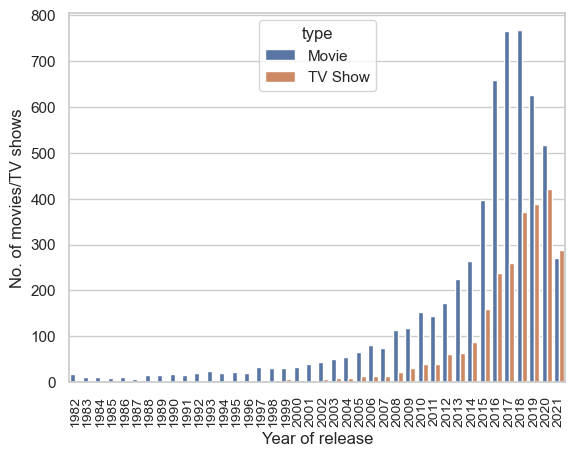

In [363]:
sns.set_theme(style='whitegrid')
sns.countplot(x=tvy['release_year'],hue=tvy['type'])
plt.xticks(rotation=90,size=10)
plt.ylabel('No. of movies/TV shows')
plt.xlabel('Year of release')
plt.show()

Number of movies released has increased exponentially in the last 30 years. Exponential growth continued till 2018-19 and then had a small dip probably because Covid-19 and theatres were all shut.

Similar is the case of TV shows but numbers are less compared to movies released in the same year. And, unlike movie it had a tip in 2018-19. It could be because TV shows are not released in theatres, rather it's released directly on OTT platforms.

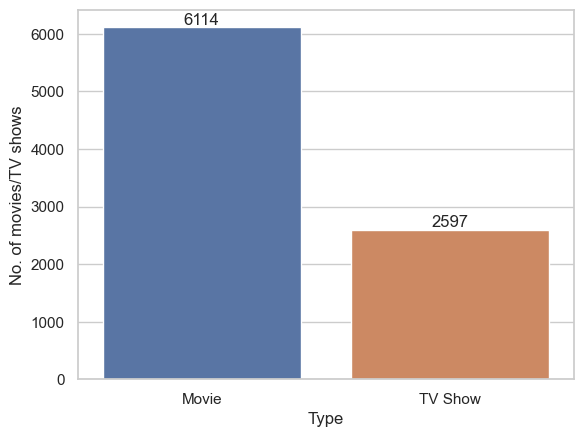

In [364]:
ax=sns.countplot(x=df['type'])
for label in ax.containers:
    ax.bar_label(label)
    
plt.ylabel('No. of movies/TV shows')
plt.xlabel('Type')
plt.show()

Out of 8817 data points major chunk is of movies(over 6000) and number of TV shows are less than 3000 that is less than half of the former one.

In [373]:
m=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
n=np.arange(1,13)
d=dict(zip(n,m))
d

{1: 'Jan',
 2: 'Feb',
 3: 'Mar',
 4: 'Apr',
 5: 'May',
 6: 'Jun',
 7: 'Jul',
 8: 'Aug',
 9: 'Sep',
 10: 'Oct',
 11: 'Nov',
 12: 'Dec'}

In [393]:
#To add added month column

def mon(x):
    try:
        return d[x.month]
    except:
        return None
dff['month_added']=dff['date_added'].apply(mon)

In [394]:
dff['month_added'].unique()

array(['Sep', 'Aug', 'Jul', 'Jun', 'May', 'Apr', 'Mar', 'Feb', 'Jan',
       'Dec', 'Nov', 'Oct', None], dtype=object)

In [395]:
dff

,show_id,type,title,date_added,release_year,rating,description,Country,Director,Cast,Genre,Duration,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,"As her father nears the end of his life, filmm...",United States,Kirsten Johnson,NaN,Documentaries,90,2021.0,Sep
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",South Africa,Bunmi Ajakaiye,Ama Qamata,International TV Shows,2,2021.0,Sep
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",South Africa,NaN,Ama Qamata,TV Dramas,2,2021.0,Sep
3,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",South Africa,NaN,Ama Qamata,TV Mysteries,2,2021.0,Sep
4,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",South Africa,Bunmi Ajakaiye,Khosi Ngema,International TV Shows,2,2021.0,Sep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201802,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,A scrappy but poor boy worms his way into a ty...,India,Mozez Singh,Anita Shabdish,International Movies,111,2019.0,Mar
201803,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,A scrappy but poor boy worms his way into a ty...,India,Mozez Singh,Anita Shabdish,Music & Musicals,111,2019.0,Mar
201804,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,A scrappy but poor boy worms his way into a ty...,India,Mozez Singh,Chittaranjan Tripathy,Dramas,111,2019.0,Mar
201805,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,A scrappy but poor boy worms his way into a ty...,India,Mozez Singh,Chittaranjan Tripathy,International Movies,111,2019.0,Mar


In [397]:
def dup(x):
    return x.drop_duplicates('date_added',keep='first')

In [398]:
dft=dff[dff['type']=='TV Show'].groupby('show_id').apply(dup)

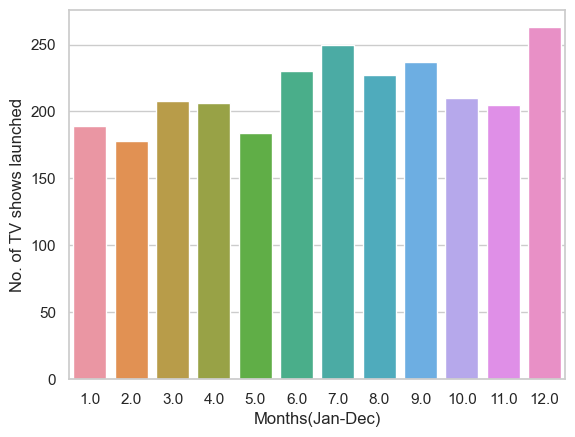

In [403]:
sns.countplot(x=dft['date_added'].dt.month)
plt.xlabel('Months(Jan-Dec)')
plt.ylabel('No. of TV shows launched')
plt.show()

When considering the whole dataset, most number of TV shows has been launched in the month of December.

In [671]:
htmp=dff[dff['type']=='TV Show'].groupby(['year_added',dff['date_added'].dt.month])['title'].nunique().reset_index().rename(columns={'date_added':'Month_added','title':'No_of_TV_shows'})
htmp

,year_added,Month_added,No_of_TV_shows
0,2008.0,2.0,1
1,2013.0,3.0,1
2,2013.0,8.0,1
3,2013.0,9.0,1
4,2013.0,10.0,2
...,...,...,...
83,2021.0,5.0,35
84,2021.0,6.0,80
85,2021.0,7.0,79
86,2021.0,8.0,56


In [675]:
htmp=htmp.pivot('year_added','Month_added','No_of_TV_shows')

<AxesSubplot:xlabel='Month_added', ylabel='year_added'>

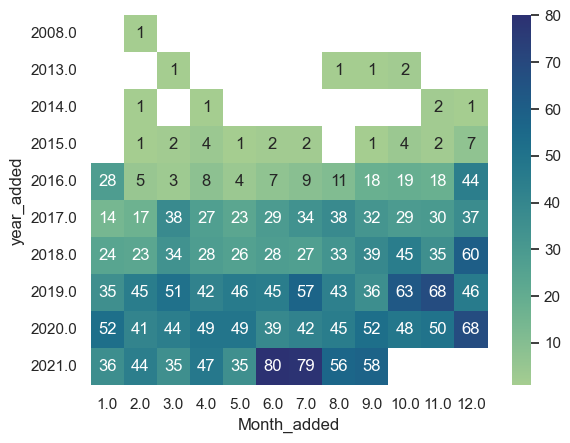

In [679]:
sns.heatmap(htmp,annot=True,cmap='crest')

The number of TV shows launched per month are generally increasing when we move towards the end of the year. For most of the years December month has the highest number of TV shows launched. But however, for the year 2021 we dont have the complete data. But we can see much higher number of shows launched in the month of june and july. 

In general, we can say that December is the most suitable month for launching a TV shows as the data shows and also, people will be having extra free time due to Christmas and New year vacations.

In [692]:
htmp2=dff[dff['type']=='Movie'].groupby(['year_added',dff['date_added'].dt.month])['title'].nunique().reset_index().rename(columns={'date_added':'Month_added','title':'No_of_movies'})
htmp2

,year_added,Month_added,No_of_movies
0,2008.0,1.0,1
1,2009.0,5.0,1
2,2009.0,11.0,1
3,2010.0,11.0,1
4,2011.0,5.0,1
...,...,...,...
100,2021.0,5.0,91
101,2021.0,6.0,122
102,2021.0,7.0,168
103,2021.0,8.0,117


<AxesSubplot:xlabel='Month_added', ylabel='year_added'>

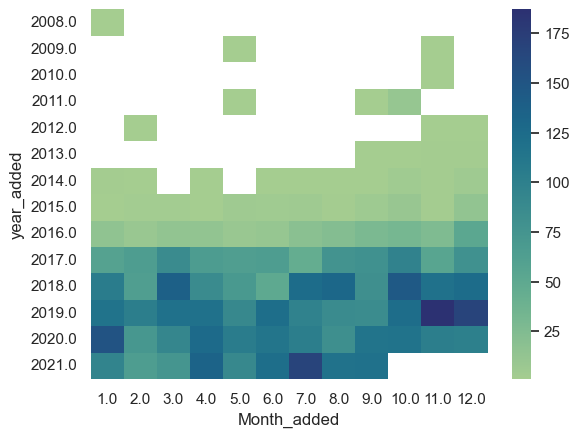

In [693]:
htmp2=htmp2.pivot('year_added','Month_added','No_of_movies')
sns.heatmap(htmp2,cmap='crest')

Unlike TV shows, movies released per month doesn't really show any pattern. 

In [339]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201807 entries, 0 to 201806
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   show_id       201807 non-null  object 
 1   type          201807 non-null  object 
 2   title         201807 non-null  object 
 3   date_added    201649 non-null  object 
 4   release_year  201807 non-null  int64  
 5   rating        201807 non-null  object 
 6   description   201807 non-null  object 
 7   Country       199738 non-null  object 
 8   Director      194399 non-null  object 
 9   Cast          200571 non-null  object 
 10  Genre         201807 non-null  object 
 11  Duration      201807 non-null  int64  
 12  year_added    201807 non-null  float64
dtypes: float64(1), int64(2), object(10)
memory usage: 25.6+ MB


In [404]:
def dupa(x):
    return x.drop_duplicates('Cast',keep='first')

def dupd(x):
    return x.drop_duplicates('Director',keep='first')

In [405]:
dft2=dff.groupby('show_id').apply(dupa)
dft3=dff.groupby('show_id').apply(dupd)

In [406]:
dft2

show_id     type                                  title  \
show_id                                                                 
s1      0          s1    Movie                   Dick Johnson Is Dead   
s10     329       s10    Movie                           The Starling   
        331       s10    Movie                           The Starling   
        333       s10    Movie                           The Starling   
        335       s10    Movie                           The Starling   
...               ...      ...                                    ...   
s997    24627    s997    Movie                             HOMUNCULUS   
        24630    s997    Movie                             HOMUNCULUS   
        24633    s997    Movie                             HOMUNCULUS   
s998    24636    s998  TV Show  Life in Color with David Attenborough   
s999    24642    s999    Movie                   Searching For Sheela   

              date_added  release_year rating  \
show_id                                         
s1      0     2021-09-25          2020  PG-13   
s10     329   2021-09-24          2021  PG-13   
        331   2021-09-24          2021  PG-13   
        333   2021-09-24          2021  PG-13   
        335   2021-09-24          2021  PG-13   
...                  ...           ...    ...   
s997    24627 2021-04-22          2021  TV-MA   
        24630 2021-04-22          2021  TV-MA   
        24633 2021-04-22          2021  TV-MA   
s998    24636 2021-04-22          2021  TV-PG   
s999    24642 2021-04-22          2021  TV-14   

                                                     description  \
show_id                                                            
s1      0      As her father nears the end of his life, filmm...   
s10     329    A woman adjusting to life after a loss contend...   
        331    A woman adjusting to life after a loss contend...   
        333    A woman adjusting to life after a loss contend...   
        335    A woman adjusting to life after a loss contend...   
...                                                          ...   
s997    24627  Truth and illusion blurs when a homeless amnes...   
        24630  Truth and illusion blurs when a homeless amnes...   
        24633  Truth and illusion blurs when a homeless amnes...   
s998    24636  Using innovative technology, this docuseries e...   
s999    24642  Journalists and fans await Ma Anand Sheela as ...   

                     Country          Director                Cast  \
show_id                                                              
s1      0      United States   Kirsten Johnson                 NaN   
s10     329    United States    Theodore Melfi    Melissa McCarthy   
        331    United States    Theodore Melfi        Chris O'Dowd   
        333    United States    Theodore Melfi         Kevin Kline   
        335    United States    Theodore Melfi    Timothy Olyphant   
...                      ...               ...                 ...   
s997    24627          Japan   Takashi Shimizu       Yukino Kishii   
        24630          Japan   Takashi Shimizu          Anna Ishii   
        24633          Japan   Takashi Shimizu        Seiyo Uchino   
s998    24636      Australia               NaN  David Attenborough   
s999    24642          India  Satyajit Bhatkal     Ma Anand Sheela   

                          Genre  Duration  year_added month_added  
show_id                                                            
s1      0         Documentaries        90      2021.0         Sep  
s10     329            Comedies       104      2021.0         Sep  
        331            Comedies       104      2021.0         Sep  
        333            Comedies       104      2021.0         Sep  
        335            Comedies       104      2021.0         Sep  
...                         ...       ...         ...         ...  
s997    24627     Horror Movies       116      2021.0         Apr  
        24630     

In [411]:
dft2['Cast'].value_counts().head(10)

David Attenborough    148
Hunter March           46
Anupam Kher            44
Mike Colter            38
Julie Tejwani          36
Shah Rukh Khan         35
Takahiro Sakurai       34
Vincent Tong           33
Naseeruddin Shah       32
Rupa Bhimani           31
Name: Cast, dtype: int64

In [440]:
dff.groupby('Director')['title'].nunique().sort_values(ascending=False)

Director
Noam Murro         457
Danny Cannon       443
Thomas Astruc      334
David Schalko      309
Ken Burns          190
                  ... 
Bruce Gowers         1
Justin Chadwick      1
Justin Chon          1
Bronwen Hughes       1
Matthew Hope         1
Name: title, Length: 4993, dtype: int64

Above are the most famous cast in Netflix. David Attenborough has been part of highest number of movies/TV shows.

In [412]:
dft2.loc[dft2['type']=='TV Show','Cast'].value_counts().head(10)

David Attenborough    142
Hunter March           45
Mike Colter            36
Takahiro Sakurai       27
Vincent Tong           20
Yuki Kaji              19
Junichi Suwabe         17
Ai Kayano              17
Frederick Lee          17
Daisuke Ono            17
Name: Cast, dtype: int64

Most famous person on Neflix when considering TV shows is David Attenborough. He has been part of much higher number of TV shows compared to others.When any new show is under plan top 3 of the above list needs to be considered.

In [414]:
dft2.loc[dft2['type']=='Movie','Cast'].value_counts().head(10)

Anupam Kher         43
Shah Rukh Khan      35
Naseeruddin Shah    32
Julie Tejwani       31
Om Puri             30
Akshay Kumar        30
Amitabh Bachchan    28
Paresh Rawal        28
Boman Irani         27
Rupa Bhimani        27
Name: Cast, dtype: int64

Most famous person on Neflix when considering movies is Anupam Kher. He has been part of much higher number of movies compared to others.When any new movie is under plan top 3 of the above list needs to be considered.

In [419]:
dft3['Director'].value_counts().head(10)

Noam Murro                  457
Danny Cannon                443
Thomas Astruc               334
David Schalko               309
Ken Burns                   190
Yasuhiro Irie               174
Shin Won-ho                 154
AdriÃ¡n GarcÃ­a Bogliano    144
Carlos Bolado               102
Rob Seidenglanz             101
Name: Director, dtype: int64

Noam Murro and Danny Cannon leads the list of directors who has directed most number of show/movie on Netflix. They have been part of whooping 457 and 443 shows respectively.

In [425]:
dft3.loc[dft3['type']=='TV Show','Director'].value_counts().head(10)

Noam Murro                  456
Danny Cannon                443
Thomas Astruc               333
David Schalko               309
Ken Burns                   188
Yasuhiro Irie               174
Shin Won-ho                 154
AdriÃ¡n GarcÃ­a Bogliano    144
Carlos Bolado               102
Rob Seidenglanz             101
Name: Director, dtype: int64

Noam Murro and Danny Cannon has done the most number of TV shows on Netflix hence they must be most popular at the same time. When any new show is being planned, any one of them(or from top 10) could be considered as the director.

In [428]:
dft3.loc[dft3['type']=='Movie','Director'].value_counts().head(10)

Peter Spirer        40
Robert Rodriguez    29
Steve Brill         24
Jan Suter           23
Paul Reubens        22
Ryan Polito         22
Rajiv Chilaka       22
Martin Scorsese     20
RaÃºl Campos        19
Anurag Kashyap      19
Name: Director, dtype: int64

Peter Spirer and Robert Rodriguez has done the most number of TV shows on Netflix hence they must be most popular at the same time. When any new show is being planned, people from top 10 needs to be considered as the cast.

In [477]:
dff.groupby('Genre')['title'].nunique().sort_values(ascending=False).head(10)

Genre
International Movies        2746
Dramas                      2423
Comedies                    1672
International TV Shows      1325
Documentaries                863
Action & Adventure           859
TV Dramas                    762
Independent Movies           756
Children & Family Movies     634
Romantic Movies              614
Name: title, dtype: int64

Top 10 Genre are as given above. International Movies, Dramas, Comedies, and International TV Shows leads the list with huge margin.

In [479]:
top_genre=dff.groupby('Genre')['title'].nunique().sort_values(ascending=False).head(10).reset_index()
top_genre

,Genre,title
0,International Movies,2746
1,Dramas,2423
2,Comedies,1672
3,International TV Shows,1325
4,Documentaries,863
5,Action & Adventure,859
6,TV Dramas,762
7,Independent Movies,756
8,Children & Family Movies,634
9,Romantic Movies,614


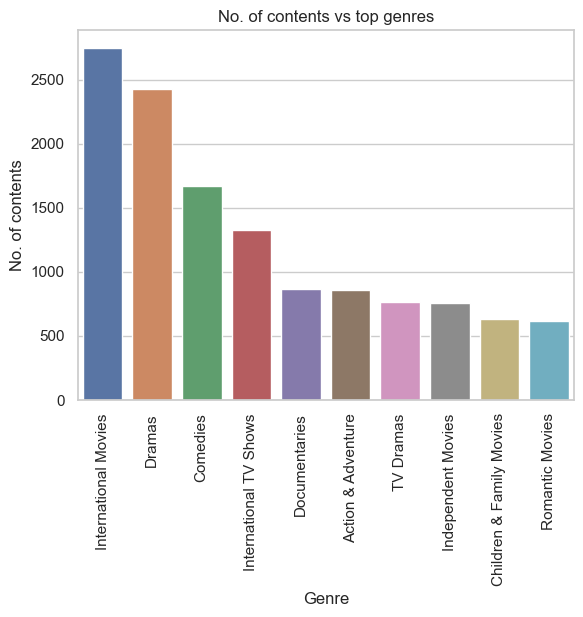

In [694]:
sns.barplot(data=top_genre, x='Genre', y='title')
plt.xticks(rotation=90)
plt.title('No. of contents vs top genres')
plt.ylabel('No. of contents')
plt.show()

Above are the top genres considering the no. of contents available for the same. International movies, Dramas, Comedies, International TV Shows are the favourite ones for the mob. 

More contents needs to be produced in the above genres so that we can target the particular audience and grow the business.

In [484]:
temp1=pd.merge(dff,top_genre,on='Genre')
temp1

,show_id,type,title_x,date_added,release_year,rating,description,Country,Director,Cast,Genre,Duration,year_added,month_added,title_y
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,"As her father nears the end of his life, filmm...",United States,Kirsten Johnson,NaN,Documentaries,90,2021.0,Sep,863
1,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,2021-09-22,2020,TV-MA,Declassified documents reveal the post-WWII li...,United States,Pedro de Echave GarcÃ­a,NaN,Documentaries,67,2021.0,Sep,863
2,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,2021-09-22,2020,TV-MA,Declassified documents reveal the post-WWII li...,United States,Pablo AzorÃ­n Williams,NaN,Documentaries,67,2021.0,Sep,863
3,s46,Movie,My Heroes Were Cowboys,2021-09-16,2021,PG,Robin Wiltshire's painful childhood was rescue...,United States,Tyler Greco,NaN,Documentaries,23,2021.0,Sep,863
4,s69,Movie,Schumacher,2021-09-15,2021,TV-14,Through exclusive interviews and archival foot...,NaN,Hanns-Bruno KammertÃ¶ns,Michael Schumacher,Documentaries,113,2021.0,Sep,863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141183,s8793,Movie,Young Tiger,2016-11-01,1973,NR,"Aided only by a tough female police officer, a...",Hong Kong,Mu Chu,Qiu Yuen,Action & Adventure,81,2016.0,Nov,859
141184,s8793,Movie,Young Tiger,2016-11-01,1973,NR,"Aided only by a tough female police officer, a...",Hong Kong,Mu Chu,Charlie Chin,Action & Adventure,81,2016.0,Nov,859
141185,s8793,Movie,Young Tiger,2016-11-01,1973,NR,"Aided only by a tough female police officer, a...",Hong Kong,Mu Chu,Jackie Chan,Action & Adventure,81,2016.0,Nov,859
141186,s8793,Movie,Young Tiger,2016-11-01,1973,NR,"Aided only by a tough female police officer, a...",Hong Kong,Mu Chu,Hu Chin,Action & Adventure,81,2016.0,Nov,859


In [486]:
temp1.groupby(['Country','Genre'])['title_x'].nunique().sort_values(ascending=False)

Country        Genre               
India          International Movies    902
United States  Dramas                  846
               Comedies                709
India          Dramas                  687
United States  Documentaries           558
                                      ... 
Slovenia       Dramas                    1
Kenya          Romantic Movies           1
               Documentaries             1
Somalia        Dramas                    1
Zimbabwe       Romantic Movies           1
Name: title_x, Length: 697, dtype: int64

In [487]:
temp1.groupby(['Country','Genre'])['title_x'].nunique().sort_values(ascending=False).head(20)

Country         Genre                   
India           International Movies        902
United States   Dramas                      846
                Comedies                    709
India           Dramas                      687
United States   Documentaries               558
                Children & Family Movies    436
                Action & Adventure          415
                Independent Movies          391
India           Comedies                    343
United States   TV Dramas                   327
                International TV Shows      255
                Romantic Movies             230
France          International Movies        215
United Kingdom  Dramas                      198
United States   International Movies        197
United Kingdom  International Movies        172
France          Dramas                      171
India           Independent Movies          170
South Korea     International TV Shows      153
Japan           International TV Shows      151

When analysing country wise most popular genres, we can see that most popular genre is International Movies in India and Netflix has launched 902 content in India. In the list second comes United States with Dramas and Comedies. From the above dataset we can identify most popular genre in each counties and launch content in those countries accordingly.

In [492]:
temp2=temp1.groupby(['Country','Genre'])['title_x'].nunique().sort_values(ascending=False).head(30).reset_index()
temp2

,Country,Genre,title_x
0,India,International Movies,902
1,United States,Dramas,846
2,United States,Comedies,709
3,India,Dramas,687
4,United States,Documentaries,558
5,United States,Children & Family Movies,436
6,United States,Action & Adventure,415
7,United States,Independent Movies,391
8,India,Comedies,343
9,United States,TV Dramas,327


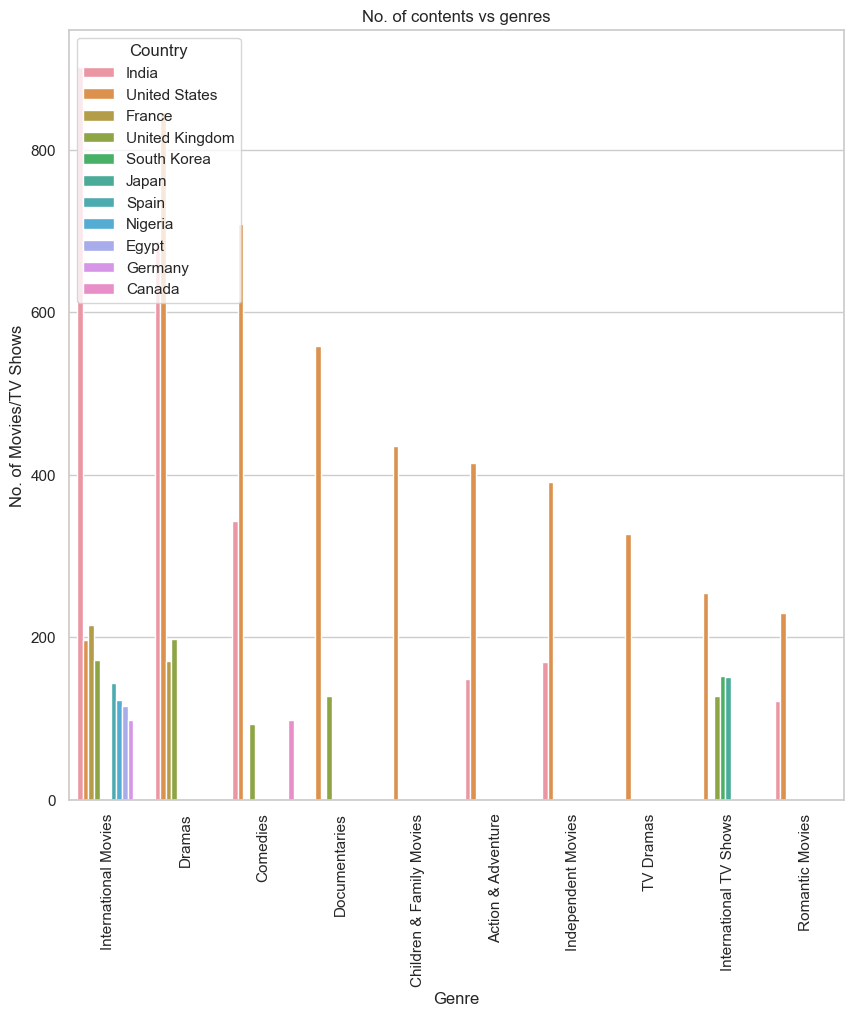

In [695]:
plt.figure(figsize=(10,10))
sns.barplot(data=temp2, x='Genre', y='title_x',hue='Country')
plt.xticks(rotation=90)
plt.ylabel('No. of Movies/TV Shows')
plt.title('No. of contents vs genres')
plt.show()

Above are the top 10 genres and their distribution over top countries. International movies leads the list and India and United States top in the same. And, second comes Dramas and United States and India leading the list in Dramas genre. We can see that in all the top 3 genres, top 2 countries with respect number of content are either India or United States. This indicates the popularity of Netflix in those countries. So when any new content is getting launched, these are the countries that cannot be omitted. 

In [530]:
temp3=dff[dff['type']=='Movie'].drop_duplicates('title')

In [546]:
plt.figure(figsize=(15,5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

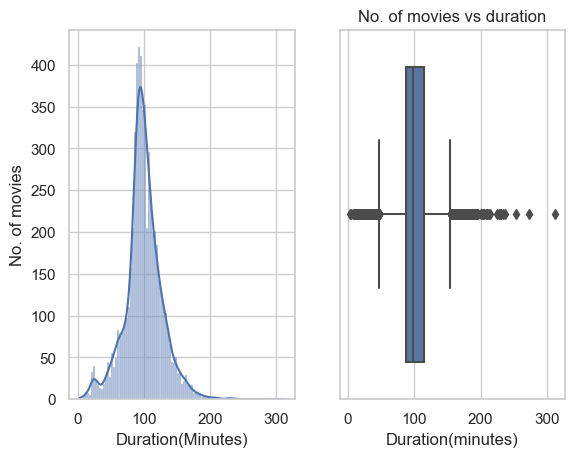

In [564]:
plt.subplot(1,2,1)

sns.histplot(data=temp3, x='Duration',kde=True)
plt.ylabel('No. of movies')
plt.xlabel('Duration(Minutes)')

plt.subplot(1,2,2)

sns.boxplot(data=temp3, x='Duration')
plt.xlabel('Duration(minutes)')
plt.title('No. of movies vs duration')
plt.show()

Here we can see that no. of movies are distributed normally with respect to duration in minutes around a mean of almost 90-100 minutes.

Here we can see that first second quartile and third quartile lie close to 100 minutes and ranges almost between 90 to 115 minutes. Here we have many outliers which is having a duration less that 50 minutes and above 160 minutes.

So when any new movie is under production plan, the duration needs to be set between 90 to 115 minutes as people are mostly comfortable with this duration range. 

Assumption: Here we make an assumption that in case of TV shows, all of them have equal no. of episodes, say 10 per season and equal duration for each episode, say 40 minutes per episode. 

In [557]:
plt.figure(figsize=(20,10))

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

In [558]:
temp4=dff[dff['type']=='TV Show'].drop_duplicates('title')

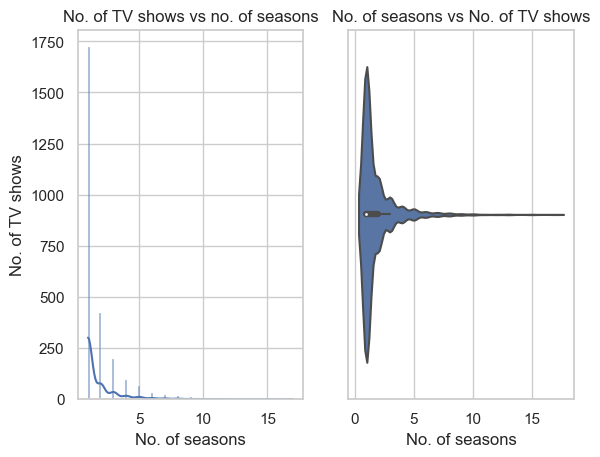

In [561]:
plt.subplot(1,2,1)

sns.histplot(data=temp4, x='Duration',kde=True)
plt.ylabel('No. of TV shows')
plt.xlabel('No. of seasons')
plt.title('No. of TV shows vs no. of seasons')

plt.subplot(1,2,2)

sns.violinplot(data=temp4, x='Duration')
plt.xlabel('No. of seasons')
plt.title('No. of seasons vs No. of TV shows')
plt.show()

Here we can see that most number of TV shows are with single season or 2 seasons. The distribution diminishes when we move towards higher number of seasons. However there are considerable number of TV shows ranging till 5 no. of seasons. There are many outliers ranging till 20 no. of seasons.

However when any new TV shows is under production planning, it would be ideal if we set the duration to a maximum number of seasons upto 2.

In [570]:
temp4=dff.groupby(['type','rating'])['title'].nunique().sort_values(ascending=False).reset_index()

In [571]:
temp4

,type,rating,title
0,Movie,TV-MA,2058
1,Movie,TV-14,1423
2,TV Show,TV-MA,1116
3,Movie,R,797
4,TV Show,TV-14,716
5,Movie,TV-PG,539
6,Movie,PG-13,490
7,TV Show,TV-PG,306
8,Movie,PG,286
9,TV Show,TV-Y7,189


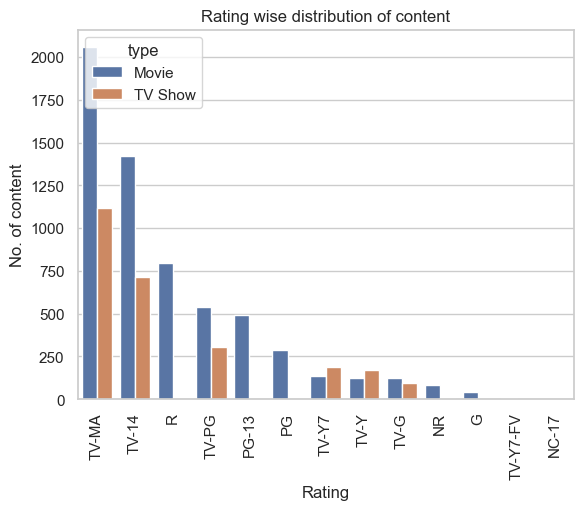

In [577]:
sns.barplot(data=temp4,x='rating',y='title', hue='type')
plt.xticks(rotation=90)
plt.xlabel('Rating')
plt.ylabel('No. of content')
plt.title('Rating wise distribution of content')
plt.show()

Maximum content is from the rating TV-MA and TV-14 and applicable to both movies and TV shows. Hence more content could be produced in these two ratings and we could target that particular set of audience.

In [589]:
dff.groupby(['Director','Cast'])['title'].nunique().reset_index().sort_values(by='title',ascending=False).rename(columns={'title':'No. of content'}).head(10)


,Director,Cast,No. of content
36833,Ken Burns,David Attenborough,91
1260,AdriÃ¡n GarcÃ­a Bogliano,Hunter March,45
48767,Noam Murro,David Attenborough,41
16684,Danny Cannon,Mike Colter,36
64234,Simon Frederick,David Attenborough,33
23791,Everardo Gout,David Attenborough,23
74665,Yasuhiro Irie,Takahiro Sakurai,23
56166,Rajiv Chilaka,Julie Tejwani,22
56172,Rajiv Chilaka,Rajesh Kava,19
53840,Peter Spirer,Chuck D.,19


Above are the most famous Director-Cast combo available on Netflix. Its evident that the these combinations has worked pretty well and that is why we have this much of content that belong to these pairs.

For a new movie/show Ken Burns-David Attenborough combo is the best one available.

In [628]:
temp6=dff.groupby(['release_year','Genre'])['title'].nunique().reset_index().rename(columns={'title':'No. of content'})
temp6

,release_year,Genre,No. of content
0,1942,Classic Movies,2
1,1942,Documentaries,2
2,1943,Classic Movies,1
3,1943,Documentaries,3
4,1944,Classic Movies,3
...,...,...,...
1185,2021,TV Sci-Fi & Fantasy,14
1186,2021,TV Shows,2
1187,2021,TV Thrillers,9
1188,2021,Teen TV Shows,7


In [629]:
def func_topg(x):
    x=x.sort_values(by='No. of content',ascending=False)
    try:
        return x.iloc[:3]
    except:
        try:
            return x.iloc[:2]
        except:
            return x.iloc[:1]

In [630]:
temp6=temp6.groupby('release_year').apply(func_topg)
temp6

release_year                   Genre  No. of content
release_year                                                           
1942         0             1942          Classic Movies               2
             1             1942           Documentaries               2
1943         3             1943           Documentaries               3
             2             1943          Classic Movies               1
1944         4             1944          Classic Movies               3
...                         ...                     ...             ...
2020         1127          2020  International TV Shows             208
             1122          2020                  Dramas             195
2021         1166          2021  International TV Shows             143
             1165          2021    International Movies             139
             1161          2021                  Dramas              90

[213 rows x 3 columns]

In [631]:
temp7=temp6[temp6['release_year']>2010]

<AxesSubplot:xlabel='release_year', ylabel='No. of content'>

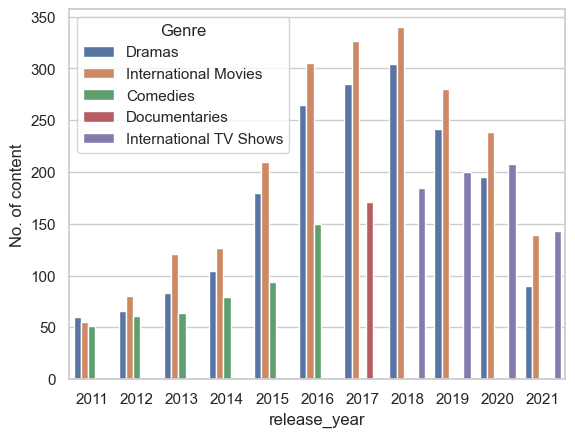

In [632]:
sns.barplot(data=temp7, x='release_year',y='No. of content', hue='Genre')

We can conclude that in the past 10 years, International movies is the genre that has always been in the top 3 considering no. of content released in the respective years. It's no. of content increased till the year 2018. However it then took a dip from then on. Similar is the case of Dramas genre. It followed the same trend as International movies and stood in the second position till 2019.

International TV shows is growing well in terms of no. of content released per year. It overtook other genres by the year 2021 and is standing in the first position. 

International TV shows are growing in demand and this is the area that we should be focusing on. New TV shows needs to be produced that has international reach. Either it needs to be in international language or the same can be dubbed into multiple local langauges to increase the reach.

In [633]:
temp8=dff.groupby(['release_year','rating'])['title'].nunique().reset_index().rename(columns={'title':'No. of content'})
temp8

,release_year,rating,No. of content
0,1942,TV-14,2
1,1943,TV-PG,3
2,1944,TV-14,2
3,1944,TV-PG,1
4,1945,TV-14,2
...,...,...,...
430,2021,TV-G,20
431,2021,TV-MA,256
432,2021,TV-PG,39
433,2021,TV-Y,25


In [634]:
def func_topr(x):
    x=x.sort_values(by='No. of content',ascending=False)
    try:
        return x.iloc[:3]
    except:
        try:
            return x.iloc[:2]
        except:
            return x.iloc[:1]

In [637]:
temp8=temp8.groupby('release_year').apply(func_topr)
temp8

release_year rating  No. of content
release_year                                         
1942         0            1942  TV-14               2
1943         1            1943  TV-PG               3
1944         2            1944  TV-14               2
             3            1944  TV-PG               1
1945         4            1945  TV-14               2
...                        ...    ...             ...
2020         420          2020  TV-14             171
             423          2020  TV-PG              77
2021         431          2021  TV-MA             256
             429          2021  TV-14             141
             432          2021  TV-PG              39

[195 rows x 3 columns]

In [638]:
temp9=temp8[temp8['release_year']>2010]

<AxesSubplot:xlabel='release_year', ylabel='No. of content'>

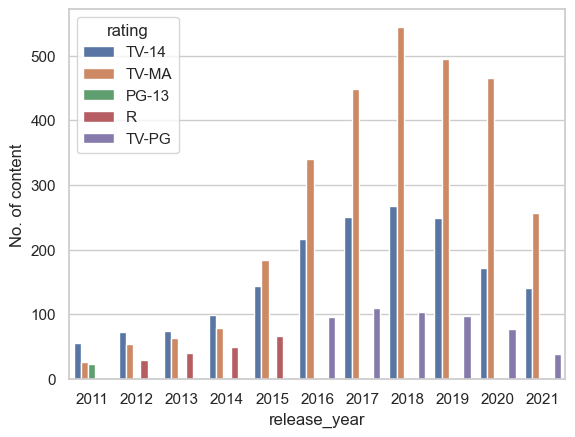

In [639]:
sns.barplot(data=temp9, x='release_year',y='No. of content', hue='rating')

In the last 10 years, we can see from the above plot that demand for the content rated TV-MA has shot up. By the year it has come to the first position.

The demand for the contents rated TV-14 has also increased much. The ratings TV-MA and TV-14 are much superior when compared in terms of no. of content released per year.

More focus needs to be given so that we can target the audience who likes TV-MA and TV-14 rated contents and business could be expanded further in that manner.

In [642]:
temp10=dff.groupby(['type', 'year_added'])['title'].nunique().reset_index().rename(columns={'title':'No. of contents added'})
temp10

,type,year_added,No. of contents added
0,Movie,2008.0,1
1,Movie,2009.0,2
2,Movie,2010.0,1
3,Movie,2011.0,13
4,Movie,2012.0,3
5,Movie,2013.0,6
6,Movie,2014.0,19
7,Movie,2015.0,56
8,Movie,2016.0,253
9,Movie,2017.0,838


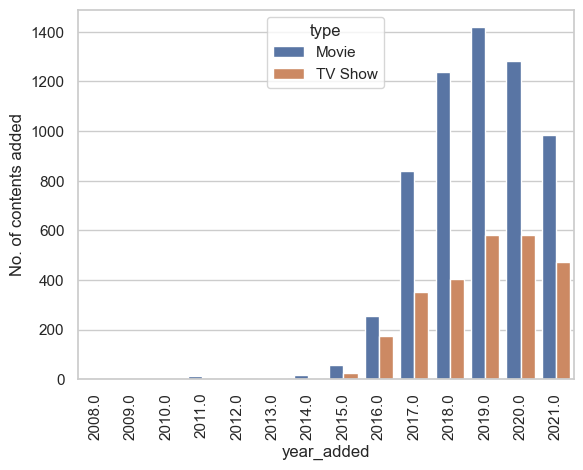

In [646]:
sns.barplot(data=temp10, x='year_added', y='No. of contents added', hue='type')
plt.xticks(rotation=90)
plt.show()

Its evident that number of movies are higher compared to number of shows from the above graph. Even though, number of movies took downturn after the year 2019, number TV shows stood almost still. The numbers of the year 2021 cannot be relied upon completely as the dataset contains the data till September month hence we cannot conclude if the number TV shows are also taking a downturn or not.

In [651]:
dff[dff['year_added']==2021]['date_added'].max()

Timestamp('2021-09-25 00:00:00')

In [652]:
dff

,show_id,type,title,date_added,release_year,rating,description,Country,Director,Cast,Genre,Duration,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,"As her father nears the end of his life, filmm...",United States,Kirsten Johnson,NaN,Documentaries,90,2021.0,Sep
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",South Africa,Bunmi Ajakaiye,Ama Qamata,International TV Shows,2,2021.0,Sep
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",South Africa,NaN,Ama Qamata,TV Dramas,2,2021.0,Sep
3,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",South Africa,NaN,Ama Qamata,TV Mysteries,2,2021.0,Sep
4,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",South Africa,Bunmi Ajakaiye,Khosi Ngema,International TV Shows,2,2021.0,Sep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201802,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,A scrappy but poor boy worms his way into a ty...,India,Mozez Singh,Anita Shabdish,International Movies,111,2019.0,Mar
201803,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,A scrappy but poor boy worms his way into a ty...,India,Mozez Singh,Anita Shabdish,Music & Musicals,111,2019.0,Mar
201804,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,A scrappy but poor boy worms his way into a ty...,India,Mozez Singh,Chittaranjan Tripathy,Dramas,111,2019.0,Mar
201805,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,A scrappy but poor boy worms his way into a ty...,India,Mozez Singh,Chittaranjan Tripathy,International Movies,111,2019.0,Mar
